In [1]:
import pydot
import graphviz
import pydotplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from IPython.display import Image  
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MaxAbsScaler
from sklearn.tree import export_graphviz


## 数据集导入，训练集与测试集分开

In [2]:
df_clean = pd.read_csv('noshowappointments-kagglev2-may-2016_clean.csv')
df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Handicap_Y/N,Age_Cate,ScheduledTime,WaitDays,WaitCate
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Mid Aged: 41 - 65,18:38:08,0,Same Day: 0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65,16:08:27,0,Same Day: 0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Mid Aged: 41 - 65,16:19:04,0,Same Day: 0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Teen: 7 - 17,17:29:31,0,Same Day: 0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Mid Aged: 41 - 65,16:07:23,0,Same Day: 0


In [3]:
df_clean['ScheduledTime']  = pd.to_datetime(df_clean['ScheduledTime'], utc=None)
df_clean['ScheduledDay']  = pd.to_datetime(df_clean['ScheduledDay'], utc=None)
df_clean['AppointmentDay']  = pd.to_datetime(df_clean['AppointmentDay'], utc=None)


In [4]:
# 保留需要的特征数据集
# kept_columns = ['Scholarship', 'Diabetes', 'Alcoholism', 'SMS_received', 'WaitDays']
# kept_columns = ['Diabetes', 'Alcoholism', 'SMS_received', 'WaitDays', 'Age']
# kept_columns = ['Scholarship', 'Diabetes', 'Alcoholism', 'SMS_received', 'WaitDays', 'Age']
# kept_columns = ['Diabetes', 'Alcoholism', 'SMS_received', 'WaitDays']
# kept_columns = ['Scholarship', 'Diabetes', 'Alcoholism', 'WaitDays', 'Age'] # F1 Score: 0.03377814845704755 ****
# kept_columns = ['Scholarship', 'Diabetes', 'Alcoholism', 'WaitDays'] # F1 Score: 0.02884012539184953
# kept_columns = ['Diabetes', 'Alcoholism', 'WaitDays', 'Age'] # F1 Score: 0.032964740246192364
# kept_columns = ['Scholarship', 'WaitDays', 'Age'] # F1 Score: 0.0333889816360601 ***
# kept_columns = ['Scholarship', 'WaitDays'] # F1 Score: 0.029227557411273485
# kept_columns = ['WaitDays', 'Age'] # F1 Score: 0.0329785013567105
# kept_columns = ['Scholarship', 'Age'] # F1 Score: 0.0

# df_features = df_clean[kept_columns].copy()


In [5]:
# 将性别数据转化为dummy variable
# df_features = df_features.join(pd.get_dummies(df_clean['Gender'], columns=['Gender_F', 'Gender_M']))
# df_features = df_features.join(pd.get_dummies(df_clean['WaitCate']))
# df_features = df_features.join(pd.get_dummies(df_clean['Age_Cate']))


In [6]:
# Normalize Age, F1 Score: 0.0333889816360601 ***
# kept_columns = ['Scholarship', 'WaitDays']
# df_features = df_clean[kept_columns].copy()
# raw_age = df_clean['Age'].values.reshape(-1, 1)
# transformer = MaxAbsScaler().fit(raw_age)
# df_features['Age_Rescaled'] = pd.DataFrame(transformer.transform(raw_age))[0]


In [7]:
# Normalize Wait_Day # 0.0333889816360601 ***
# kept_columns = ['Scholarship', 'Age']
# df_features = df_clean[kept_columns].copy()
# raw_waitday = df_clean['WaitDays'].values.reshape(-1, 1)
# transformer = MaxAbsScaler().fit(raw_waitday)
# df_features['WaitDays_Rescaled'] = pd.DataFrame(transformer.transform(raw_waitday))[0]


In [8]:
# Scholarship & Normalized age, Waitday F1 Score: 0.0333889816360601
# kept_columns = ['Scholarship']
# df_features = df_clean[kept_columns].copy()

# raw_age = df_clean['Age'].values.reshape(-1, 1)
# transformer = MaxAbsScaler().fit(raw_age)
# df_features['Age_Rescaled'] = pd.DataFrame(transformer.transform(raw_age))[0]

# raw_waitday = df_clean['WaitDays'].values.reshape(-1, 1)
# transformer = MaxAbsScaler().fit(raw_waitday)
# df_features['WaitDays_Rescaled'] = pd.DataFrame(transformer.transform(raw_waitday))[0]


In [9]:
# Normalized age, Waitday F1 Score: 0.0329785013567105
# kept_columns = []
# df_features = df_clean[kept_columns].copy()

# raw_age = df_clean['Age'].values.reshape(-1, 1)
# transformer = MaxAbsScaler().fit(raw_age)
# df_features['Age_Rescaled'] = pd.DataFrame(transformer.transform(raw_age))[0]

# raw_waitday = df_clean['WaitDays'].values.reshape(-1, 1)
# transformer = MaxAbsScaler().fit(raw_waitday)
# df_features['WaitDays_Rescaled'] = pd.DataFrame(transformer.transform(raw_waitday))[0]


In [10]:
# 增加年龄层 F1 Score: 0.40850244926522045 & F1 Score: 0.4434374666808828
# kept_columns = ['Scholarship', 'Alcoholism', 'SMS_received', 'Hypertension', 'Handicap_Y/N'] # F1 Score: 0.4274378147413399 & F1 Score: 0.44466232193321414
# kept_columns = ['Scholarship', 'Alcoholism', 'SMS_received', 'Hypertension'] # F1 Score: 0.42731647696890995 & F1 Score: 0.4449448322449899
# kept_columns = ['Scholarship','SMS_received', 'Hypertension'] # F1 Score: 0.42626216195510613 & F1 Score: 0.42951937984496125
# kept_columns = ['Scholarship'] # F1 Score: 0.4295281812024983 & F1 Score: 0.4237550631403383
kept_columns = ['Scholarship', 'Diabetes', 'Alcoholism', 'WaitDays', 'Age']
df_features = df_clean[kept_columns].copy()

#df_features['Age_Cate'] = df_clean['Age_Cate'].map({"Children: -1 - 6":0,
#                                                    "Teen: 7 - 17":1,
#                                                    "Youth: 18 - 40":2,
#                                                    "Mid Aged: 41 - 65":3,
#                                                    "Elders: 66+ ":4})

# 增加等待市场分类
#df_features['WaitCate'] = df_clean['WaitCate'].map({"Same Day: 0":0,
#                                                    "Short Time: 1-3":1,
#                                                    "A Week: 4-7":2,
#                                                    "Fortnight: 8-14":3,
#                                                    "A Month: 15-30":4,
#                                                    "A Quarter: 31 - 90":5,
#                                                    "Half a Year: 91 - 180":6})

# df_features['ScheduledHour'] = df_clean['ScheduledTime'].dt.hour
# df_features['ScheduledWeekDay'] = df_clean['ScheduledDay'].dt.weekday
# df_features['AppointmentWeekDay'] = df_clean['AppointmentDay'].dt.weekday
# df_features['Neighbourhood'] = pd.factorize(df_clean['Neighbourhood'])[0]
#df_features['Gender'] = df_clean['Gender'].map({"F":0, "M":1})


In [11]:
df_features.head()


,Scholarship,Diabetes,Alcoholism,WaitDays,Age
0,0,0,0,0,62
1,0,0,0,0,56
2,0,0,0,0,62
3,0,0,0,0,8
4,0,1,0,0,56


In [12]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109188 entries, 0 to 109187
Data columns (total 5 columns):
Scholarship    109188 non-null int64
Diabetes       109188 non-null int64
Alcoholism     109188 non-null int64
WaitDays       109188 non-null int64
Age            109188 non-null int64
dtypes: int64(5)
memory usage: 4.2 MB


In [13]:
# 保留需要的标签数据集
df_labels = df_clean['No-show'].map({"Yes":1, "No":0}).copy()

In [14]:
df_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: No-show, dtype: int64

In [15]:
# 使用KFold区分训练集和测试集
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(df_features):
    features_train, features_test = df_features.loc[train_index], df_features.loc[test_index]
    labels_train, labels_test = df_labels.loc[train_index], df_labels.loc[test_index]
    

In [16]:
import statsmodels.api as sm
from scipy import stats

features_train_sm = features_train.copy()
features_train_sm['intercept'] = 1

model = sm.Logit(labels_train, features_train_sm).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.480194
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                No-show   No. Observations:                87351
Model:                          Logit   Df Residuals:                    87345
Method:                           MLE   Df Model:                            5
Date:                Sat, 23 Mar 2019   Pseudo R-squ.:                 0.03584
Time:                        18:06:44   Log-Likelihood:                -41945.
converged:                       True   LL-Null:                       -43504.
                                        LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Scholarship     0.2448      0.028      8.870      0.000       0.191       0.299
Diabetes        0.0883      0.037      2.411      0.016       0.017       0.160
Alcoholism      0.1878      0.050      3.732      0.000       0.089       0.287
WaitDays        0.0269      0.001     52.407      0.000       0.026       0.028
Age            -0.0078      0.000    -19.292      0.000      -0.009      -0.007
intercept      -1.4680      0.017    -84.387      0.000      -1.502      -1.434
===============================================================================
"""

In [17]:
features_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87351 entries, 0 to 109187
Data columns (total 6 columns):
Scholarship    87351 non-null int64
Diabetes       87351 non-null int64
Alcoholism     87351 non-null int64
WaitDays       87351 non-null int64
Age            87351 non-null int64
intercept      87351 non-null int64
dtypes: int64(6)
memory usage: 4.7 MB


## sklearn逻辑回归

In [18]:
lm = LogisticRegression(penalty='l2', C=1e9, fit_intercept=True, intercept_scaling=1, random_state=42, solver='lbfgs', max_iter=300, class_weight="balanced")
# lm = LogisticRegression(penalty='l1', C=1e9, fit_intercept=True, intercept_scaling=1, random_state=42, max_iter=300)
lm.fit(features_train, labels_train)


LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=300,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [19]:
lm.score(features_test, labels_test)


0.6902504922837386

In [20]:
lm.classes_


array([0, 1], dtype=int64)

In [21]:
lm.coef_


array([[ 0.23276735,  0.11003401,  0.15496348,  0.03293769, -0.00724937]])

In [22]:
labels_pred = lm.predict(features_test)
print("Accuracy:",metrics.accuracy_score(labels_test, labels_pred))
print("Precision:",metrics.precision_score(labels_test, labels_pred))
print("Recall:",metrics.recall_score(labels_test, labels_pred))
print("F1 Score:",metrics.f1_score(labels_test, labels_pred))


Accuracy: 0.6902504922837386
Precision: 0.3384057971014493
Recall: 0.5149977944419938
F1 Score: 0.40843099527724336


In [23]:
df_features.columns.to_list()


['Scholarship', 'Diabetes', 'Alcoholism', 'WaitDays', 'Age']

## 决策树

In [24]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1000, random_state=42, max_features='auto', class_weight="balanced")
# parameters = {"penalty":("l2", "l1"), "c"=[0.1, 10, 100]}
# clf = GridSearchCV(lm2, cv=5)
tree.fit(features_train, labels_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [25]:
tree.score(features_test, labels_test)


0.5732930347575217

In [26]:
tree.feature_importances_


array([9.59121183e-03, 7.54310200e-04, 0.00000000e+00, 8.84129992e-01,
       1.05524486e-01])

In [27]:
tree.decision_path(features_train)


<87351x65 sparse matrix of type '<class 'numpy.int64'>'
	with 582994 stored elements in Compressed Sparse Row format>

In [28]:
labels_pred = tree.predict(features_test)
print("Accuracy:",metrics.accuracy_score(labels_test, labels_pred))
print("Precision:",metrics.precision_score(labels_test, labels_pred))
print("Recall:",metrics.recall_score(labels_test, labels_pred))
print("F1 Score:",metrics.f1_score(labels_test, labels_pred))


Accuracy: 0.5732930347575217
Precision: 0.30597014925373134
Recall: 0.8319364799294221
F1 Score: 0.44739651286917326


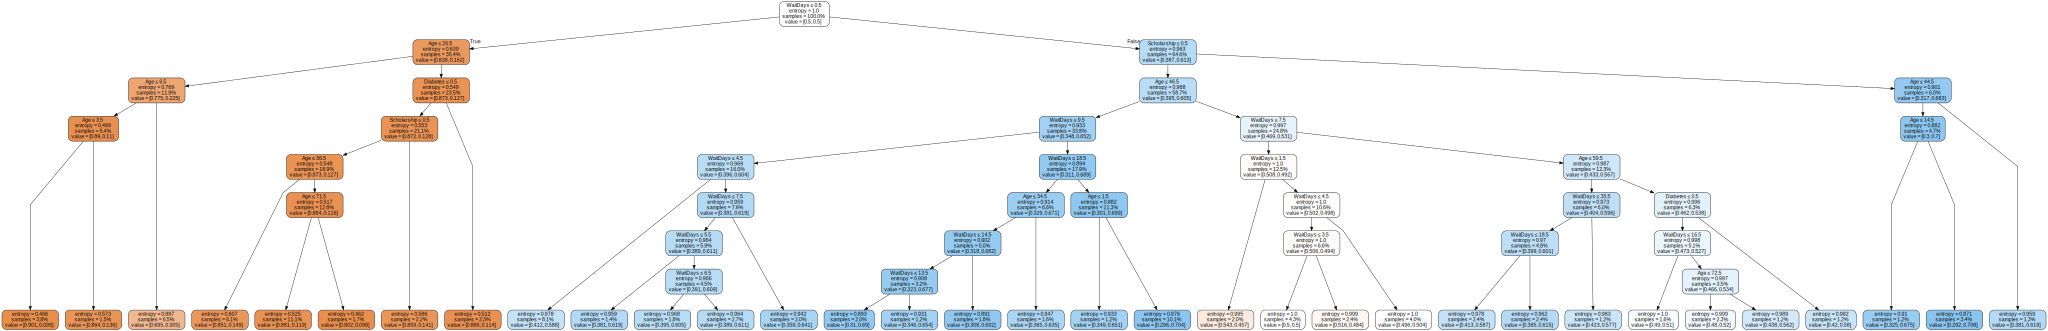

In [29]:


# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

dot_data = export_graphviz(tree, out_file=None, feature_names=df_features.columns.to_list(), leaves_parallel=True,
                filled=True, rounded=True, proportion=True,
                special_characters=True)


graph = graphviz.Source(source=dot_data)
graph

In [30]:
# 导出决策树图片
# https://graphviz.readthedocs.io/en/stable/api.html
graph.view(filename="tree", directory=".")

'.\\tree.pdf'